<a href="https://colab.research.google.com/github/awhitehouse1/DS4002-Project-1/blob/main/EDA1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Questions 1-3

In [6]:
# Loading data set
import pandas as pd

# Load the CSV file
file_path = '/content/amazon_reviews.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

In [7]:
# variable types
# Get the variable types
variable_types = df.dtypes

# Display the variable types
print(variable_types)

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object


In [8]:
len(df) # The dataset has 4915 reviews (rows)

4915

In [9]:
# Count reviews with helpful_yes greater than 0
count_helpful_yes = df[df['helpful_yes'] > 0].shape[0]

# Count reviews with helpful_no greater than 0
count_helpful_no = df[df['helpful_no'] > 0].shape[0]

# Display the results
print(f"Number of reviews with helpful_yes: {count_helpful_yes}")
print(f"Number of reviews with helpful_no: {count_helpful_no}")

# 413 reviews were helpful
# 241 reviews were not helpful

# Count reviews where both helpful_yes and helpful_no are 0
count_neither = df[(df['helpful_yes'] == 0) & (df['helpful_no'] == 0)].shape[0]

# Display the result
print(f"Number of reviews with neither helpful_yes nor helpful_no: {count_neither}")

# 4360 reviews had no votes for helpful_yes or helpful_no
# That is majority of our dataset so knowing this, we should not
# focus our energy on those variables.

Number of reviews with helpful_yes: 413
Number of reviews with helpful_no: 241
Number of reviews with neither helpful_yes nor helpful_no: 4360


In [10]:
# Calculate averages
average_helpful_yes = df['helpful_yes'].mean()
average_helpful_no = df['helpful_no'].mean()
average_total_vote = df['total_vote'].mean()

# Display the results
print(f"Average helpful_yes: {average_helpful_yes}")
print(f"Average helpful_no: {average_helpful_no}")
print(f"Average total_vote: {average_total_vote}")

# helpful_yes avg: 1.311
# helpful_no avg: 0.21
# total_vote avg: 1.52

Average helpful_yes: 1.3110885045778229
Average helpful_no: 0.21037639877924721
Average total_vote: 1.5214649033570702


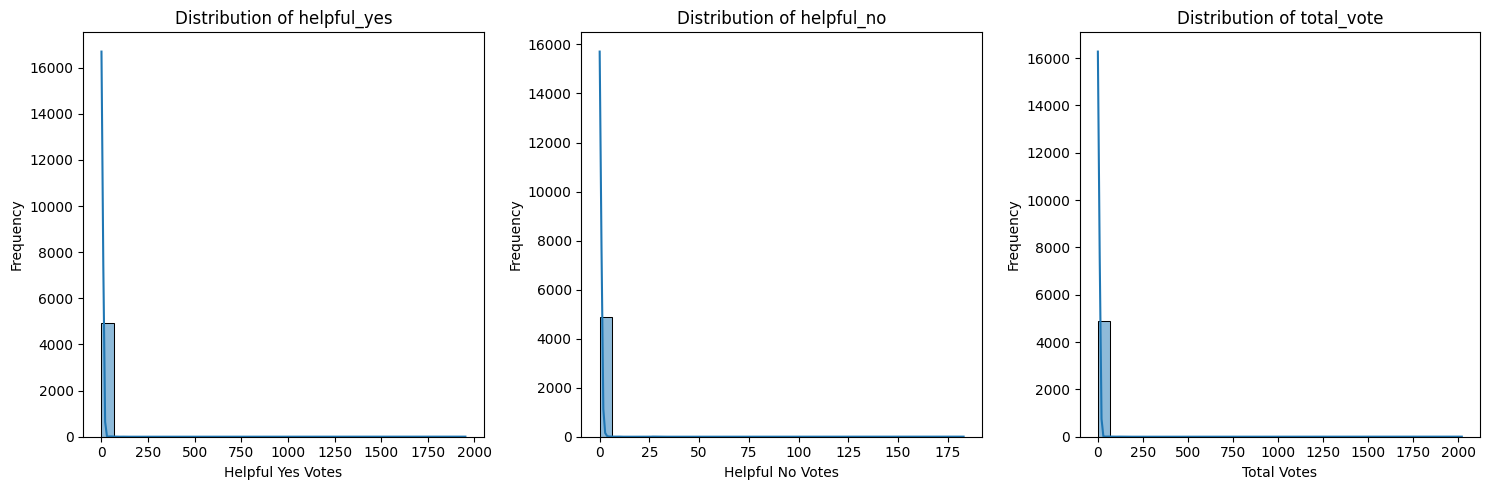

In [11]:
# Making distribution plots
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Distribution plot for helpful_yes
plt.subplot(1, 3, 1)
sns.histplot(df['helpful_yes'], bins=30, kde=True)
plt.title('Distribution of helpful_yes')
plt.xlabel('Helpful Yes Votes')
plt.ylabel('Frequency')

# Distribution plot for helpful_no
plt.subplot(1, 3, 2)
sns.histplot(df['helpful_no'], bins=30, kde=True)
plt.title('Distribution of helpful_no')
plt.xlabel('Helpful No Votes')
plt.ylabel('Frequency')

# Distribution plot for total_vote
plt.subplot(1, 3, 3)
sns.histplot(df['total_vote'], bins=30, kde=True)
plt.title('Distribution of total_vote')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


In [12]:
# Find the review with the highest helpful_yes
highest_helpful_yes_index = df['helpful_yes'].idxmax()
highest_helpful_yes_review = df.iloc[highest_helpful_yes_index]

# Find the review with the highest helpful_no
highest_helpful_no_index = df['helpful_no'].idxmax()
highest_helpful_no_review = df.iloc[highest_helpful_no_index]

# Find the review with the highest total_vote
highest_total_vote_index = df['total_vote'].idxmax()
highest_total_vote_review = df.iloc[highest_total_vote_index]

# Display the results
print("Review with highest helpful_yes:")
print(highest_helpful_yes_review)

print("\nReview with highest helpful_no:")
print(highest_helpful_no_review)

print("\nReview with highest total_vote:")
print(highest_total_vote_review)


Review with highest helpful_yes:
Unnamed: 0                                                           2031
reviewerName                                         Hyoun Kim "Faluzure"
overall                                                               5.0
reviewText              [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
reviewTime                                                     2013-01-05
day_diff                                                              702
helpful_yes                                                          1952
helpful_no                                                             68
total_vote                                                           2020
score_pos_neg_diff                                                   1884
score_average_rating                                             0.966337
wilson_lower_bound                                               0.957544
Name: 2031, dtype: object

Review with highest helpful_no:
Unnamed: 0          

<ipython-input-13-18ad4e3442f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, palette='viridis')


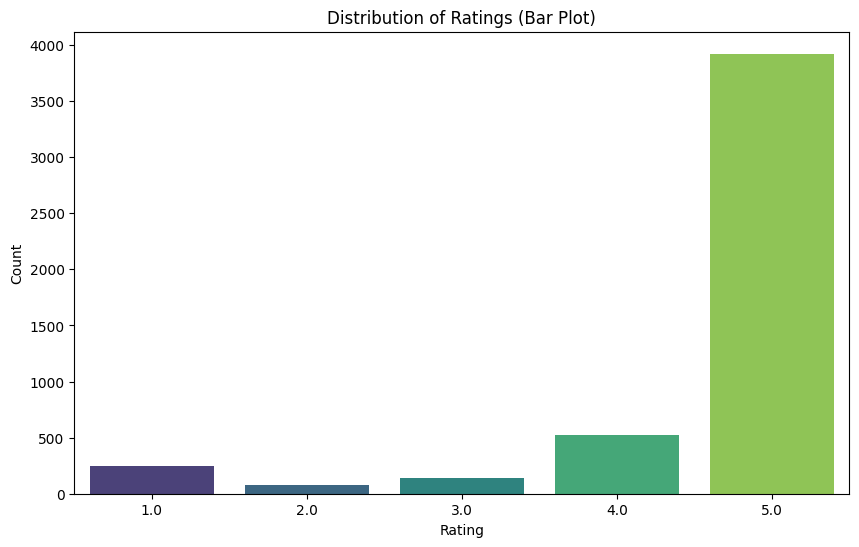

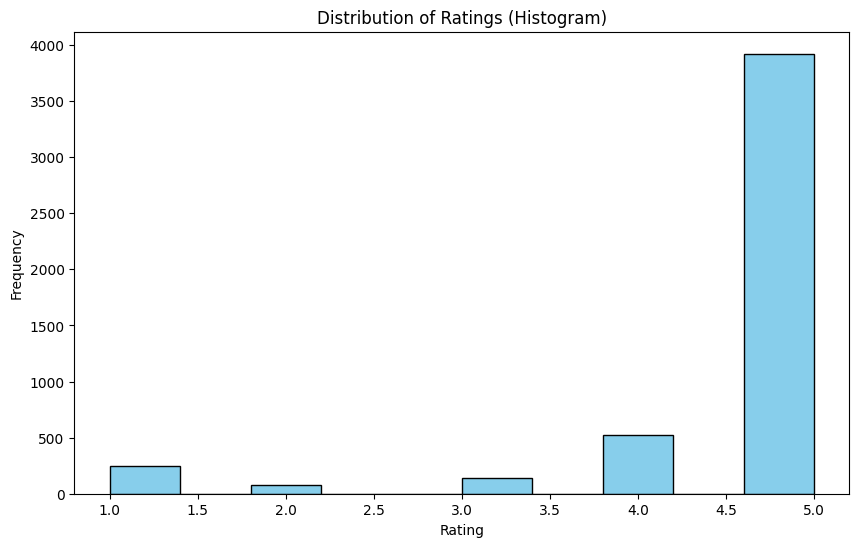

In [13]:
# Bar plot
plt.figure(figsize=(10,6))
sns.countplot(x='overall', data=df, palette='viridis')
plt.title('Distribution of Ratings (Bar Plot)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Histogram
plt.figure(figsize=(10,6))
plt.hist(df['overall'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings (Histogram)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [16]:
df[df['total_vote']==df['total_vote'].max()]  # Review 2031 has 2,020 votes


df.describe() # mean overall rating = 4.59

df[df['overall']==df['overall'].max()]  # 3,922 5 star ratings

df[df['overall']==df['overall'].min()] # 244 1 star ratings



,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
32,32,"Abdulrahman J. Alrashed ""dr34m3r""",1.0,"I bought 2 of those SanDisk 32 GB microSD , us...",2013-03-08,640,0,0,0,0,0.0,0.000000
38,38,Abraham Arturo Meza Marin,1.0,I bougth this micro SD card after some trubles...,2013-02-19,657,0,0,0,0,0.0,0.000000
43,43,"Abused Commuter ""abused_commuter""",1.0,Ordered this for a Galaxy S3. Lasted a few mo...,2013-07-20,506,0,1,1,-1,0.0,0.000000
143,143,"Ali Etezadkhah ""Ali""",1.0,I have an old SanDisk SD card that still works...,2013-06-22,534,0,0,0,0,0.0,0.000000
174,174,A. Marte,1.0,I bought this on August of 2013. As of April ...,2014-06-25,166,1,0,1,1,1.0,0.206549
...,...,...,...,...,...,...,...,...,...,...,...,...
4867,4867,xplics,1.0,Buyer beware card unreadable from the get go. ...,2012-09-19,810,3,2,5,1,0.6,0.230724
4891,4891,Zach S.,1.0,This was the fastest microSD card I have teste...,2013-03-22,626,1,0,1,1,1.0,0.206549
4892,4892,Zackariah Zielieke,1.0,"Hello,Great card, great price. Plenty of speed...",2013-12-26,347,0,1,1,-1,0.0,0.000000
4904,4904,zhengziying,1.0,DO NOT PUT ANY IMPORTANT DATA IN IT. DO NOT US...,2012-05-12,940,1,1,2,0,0.5,0.094531
